# 微分方程式的級數解

## 常點 (ordinary point) 解

---

### 5.1 節例題 5

解以下微分方程式的冪級數解：

$$
y'' + (\cos x) y' = 0,
$$


求前 10 項展開的解。

---

### 用 SageMath 解問題

以下是用 SageMath 解該問題的詳細步驟：

#### 第一步：定義變數和符號
我們需要定義變數 $x$ 和冪級數的係數 $a_n$。

In [1]:
# 定義變數和符號
x = var('x')  # 定義變數 x
n_terms = 6  # 展開的項數
a = [var(f'a_{i}') for i in range(n_terms)]  # 定義符號 a_0, a_1, ..., a_(n_terms-1)

#### 第二步：假設解為冪級數形式
將解表示為冪級數的形式：

$$
y(x) = \sum_{n=0}^{n_{\text{terms}}} a_n x^n
$$

其中 $n_{\text{terms}}$ 為展開之項數。在 SageMath 中可以寫為：

In [2]:
# 假設解為冪級數形式, a[i] 為係數串列, i = 0, ..., n_terms
y_series = sum(a[i] * x^i for i in range(n_terms))

#### 第三步：計算導數
我們需要計算一階和二階導數以代入微分方程。

In [3]:
# 計算一階和二階導數
y_prime = diff(y_series, x)
y_double_prime = diff(y_prime, x)

#### 第四步：代入微分方程
使用冪級數和導數解方程式：

$$
y'' + (\cos x) y' = 0,
$$

須先將 $\cos x$ 用 `taylor` 指令在 $x=0$ 處展開：

In [4]:
%display latex
cos_series = taylor(cos(x), x, 0, n_terms)
cos_series

-1/720*x^6 + 1/24*x^4 - 1/2*x^2 + 1

In [5]:
# 定義二階微分方程
ode = y_double_prime + cos_series * y_series
ode

20*a_5*x^3 + 12*a_4*x^2 - 1/720*(a_5*x^5 + a_4*x^4 + a_3*x^3 + a_2*x^2 + a_1*x + a_0)*(x^6 - 30*x^4 + 360*x^2 - 720) + 6*a_3*x + 2*a_2

#### 第五步：展開並匹配係數
展開方程並匹配每個次數的係數，形成遞迴關係。

In [6]:
# 展開微分方程並收集項
lhs = ode.expand()
lhs

-1/720*a_5*x^11 - 1/720*a_4*x^10 - 1/720*a_3*x^9 + 1/24*a_5*x^9 - 1/720*a_2*x^8 + 1/24*a_4*x^8 - 1/720*a_1*x^7 + 1/24*a_3*x^7 - 1/2*a_5*x^7 - 1/720*a_0*x^6 + 1/24*a_2*x^6 - 1/2*a_4*x^6 + 1/24*a_1*x^5 - 1/2*a_3*x^5 + a_5*x^5 + 1/24*a_0*x^4 - 1/2*a_2*x^4 + a_4*x^4 - 1/2*a_1*x^3 + a_3*x^3 + 20*a_5*x^3 - 1/2*a_0*x^2 + a_2*x^2 + 12*a_4*x^2 + a_1*x + 6*a_3*x + a_0 + 2*a_2

In [7]:
# 匹配係數生成遞迴關係
coefficients = lhs.coefficients(x, n_terms)  # 提取各次項係數
coefficients

[a_0 + 2*a_2,
 a_1 + 6*a_3,
 -1/2*a_0 + a_2 + 12*a_4,
 -1/2*a_1 + a_3 + 20*a_5,
 1/24*a_0 - 1/2*a_2 + a_4,
 1/24*a_1 - 1/2*a_3 + a_5,
 -1/720*a_0 + 1/24*a_2 - 1/2*a_4,
 -1/720*a_1 + 1/24*a_3 - 1/2*a_5,
 -1/720*a_2 + 1/24*a_4,
 -1/720*a_3 + 1/24*a_5,
 -1/720*a_4,
 -1/720*a_5]

In [8]:
recurrence_eqs = [eq == 0 for eq in coefficients]  # 建立遞迴公式
recurrence_eqs

[a_0 + 2*a_2 == 0,
 a_1 + 6*a_3 == 0,
 -1/2*a_0 + a_2 + 12*a_4 == 0,
 -1/2*a_1 + a_3 + 20*a_5 == 0,
 1/24*a_0 - 1/2*a_2 + a_4 == 0,
 1/24*a_1 - 1/2*a_3 + a_5 == 0,
 -1/720*a_0 + 1/24*a_2 - 1/2*a_4 == 0,
 -1/720*a_1 + 1/24*a_3 - 1/2*a_5 == 0,
 -1/720*a_2 + 1/24*a_4 == 0,
 -1/720*a_3 + 1/24*a_5 == 0,
 -1/720*a_4 == 0,
 -1/720*a_5 == 0]

In [9]:
# 顯示遞迴公式
print("生成的遞迴關係：")
for eq in recurrence_eqs:
    show(eq)

生成的遞迴關係：


a_0 + 2*a_2 == 0

a_1 + 6*a_3 == 0

-1/2*a_0 + a_2 + 12*a_4 == 0

-1/2*a_1 + a_3 + 20*a_5 == 0

1/24*a_0 - 1/2*a_2 + a_4 == 0

1/24*a_1 - 1/2*a_3 + a_5 == 0

-1/720*a_0 + 1/24*a_2 - 1/2*a_4 == 0

-1/720*a_1 + 1/24*a_3 - 1/2*a_5 == 0

-1/720*a_2 + 1/24*a_4 == 0

-1/720*a_3 + 1/24*a_5 == 0

-1/720*a_4 == 0

-1/720*a_5 == 0

#### 第六步：設定初始條件並遞迴計算
設定初始條件 $a_0 = 0, a_1 = 1$：

In [10]:
# 初始條件 (設定 a_0 和 a_1 的值)
initial_conditions = {a[0]: 1, a[1]: 1}  # 修改此處根據需要設定初始條件
coeff_values = initial_conditions.copy()

計算後續係數 ：

In [11]:
# 遞迴計算具體數值
for i in range(2, n_terms):
    # 解遞迴公式
    solution = solve(recurrence_eqs[i-2], a[i])
    if solution:
        # 如果 `solve` 返回的是等式列表，提取右側的值
        if isinstance(solution, list):
            coeff_values[a[i]] = solution[0].rhs().subs(coeff_values).simplify()
        else:
            coeff_values[a[i]] = solution.rhs().subs(coeff_values).simplify()
    else:
        coeff_values[a[i]] = 0

#### 第七步：輸出結果
輸出所有計算得到的係數值：

In [12]:
# 顯示解出的係數數值
print("解出的係數值：")
for i in range(n_terms):
    # 確保數值計算
    numeric_value = coeff_values[a[i]].n()
    print(f"a_{i} = {numeric_value}")

解出的係數值：
a_0 = 1.00000000000000
a_1 = 1.00000000000000
a_2 = -0.500000000000000
a_3 = -0.166666666666667
a_4 = 0.0833333333333333
a_5 = 0.0333333333333333


以求出之係數顯示級數解：

In [13]:
f_approx = sum(coeff_values[a[i]] * x^i for i in range(n_terms))
f_approx

1/30*x^5 + 1/12*x^4 - 1/6*x^3 - 1/2*x^2 + x + 1

與前述正解比較：

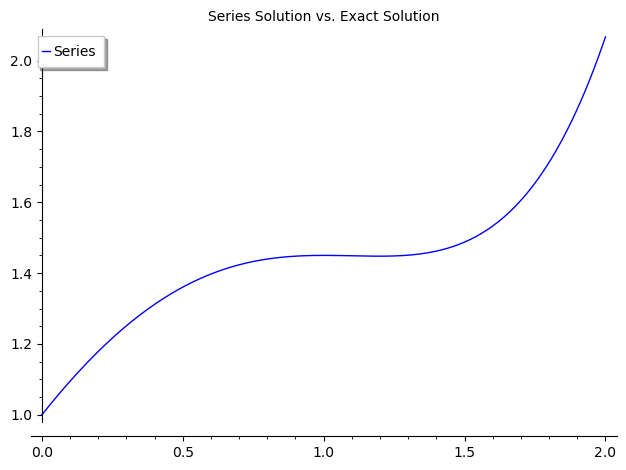

In [15]:
p1 = plot(f_approx, (x, 0, 2), title="Series Solution vs. Exact Solution", legend_label="Series", color="blue")
#p2 = plot(arctan(x), (x, 0, 1.5), legend_label="Exact", color="red")
show(p1)
#show(p1+p2)

### 後續討論

1. 展開階數與精確度關係？
2. 如何分析誤差？